In [399]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random

In [400]:
#load the data
data = pd.read_excel('cancer_risk.xlsx')
data.head(4)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0


In [401]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [402]:
#Data description
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data has some missing values named as '?', and made the whole column become an object. To do further computation, we have to replace '?' with NaN and turn the object type to numeric type.

In [403]:
data = data.replace('?', np.nan)

In [404]:
# Check for duplicates in the data
#data.duplicated().sum()

In [405]:
# Drop the duplicates
#data = data.drop_duplicates(keep='first')
# i will choose not to drop duplicates because different patients could have exactly the same information

In [406]:
# Check for null values
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [407]:
# Make the data numeric
data.apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

<i>Now fill all the Nan values and 1 for categorical


In [408]:
# For the continuous data

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Smokes'] = data['Smokes'].fillna(1)
data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(1)
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['IUD'] = data['IUD'].fillna(0) 
data['IUD (years)'] = data['IUD (years)'].fillna(0) 
data['STDs'] = data['STDs'].fillna(1)
data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())

In [409]:
# Then the categorical data
data = pd.get_dummies(data=data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [410]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
2,34,1.0,17.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.0,4.0,37.0,37.0,3.00,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,15.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
854,32,2.0,19.0,1.0,0.0,0.0,8.00,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


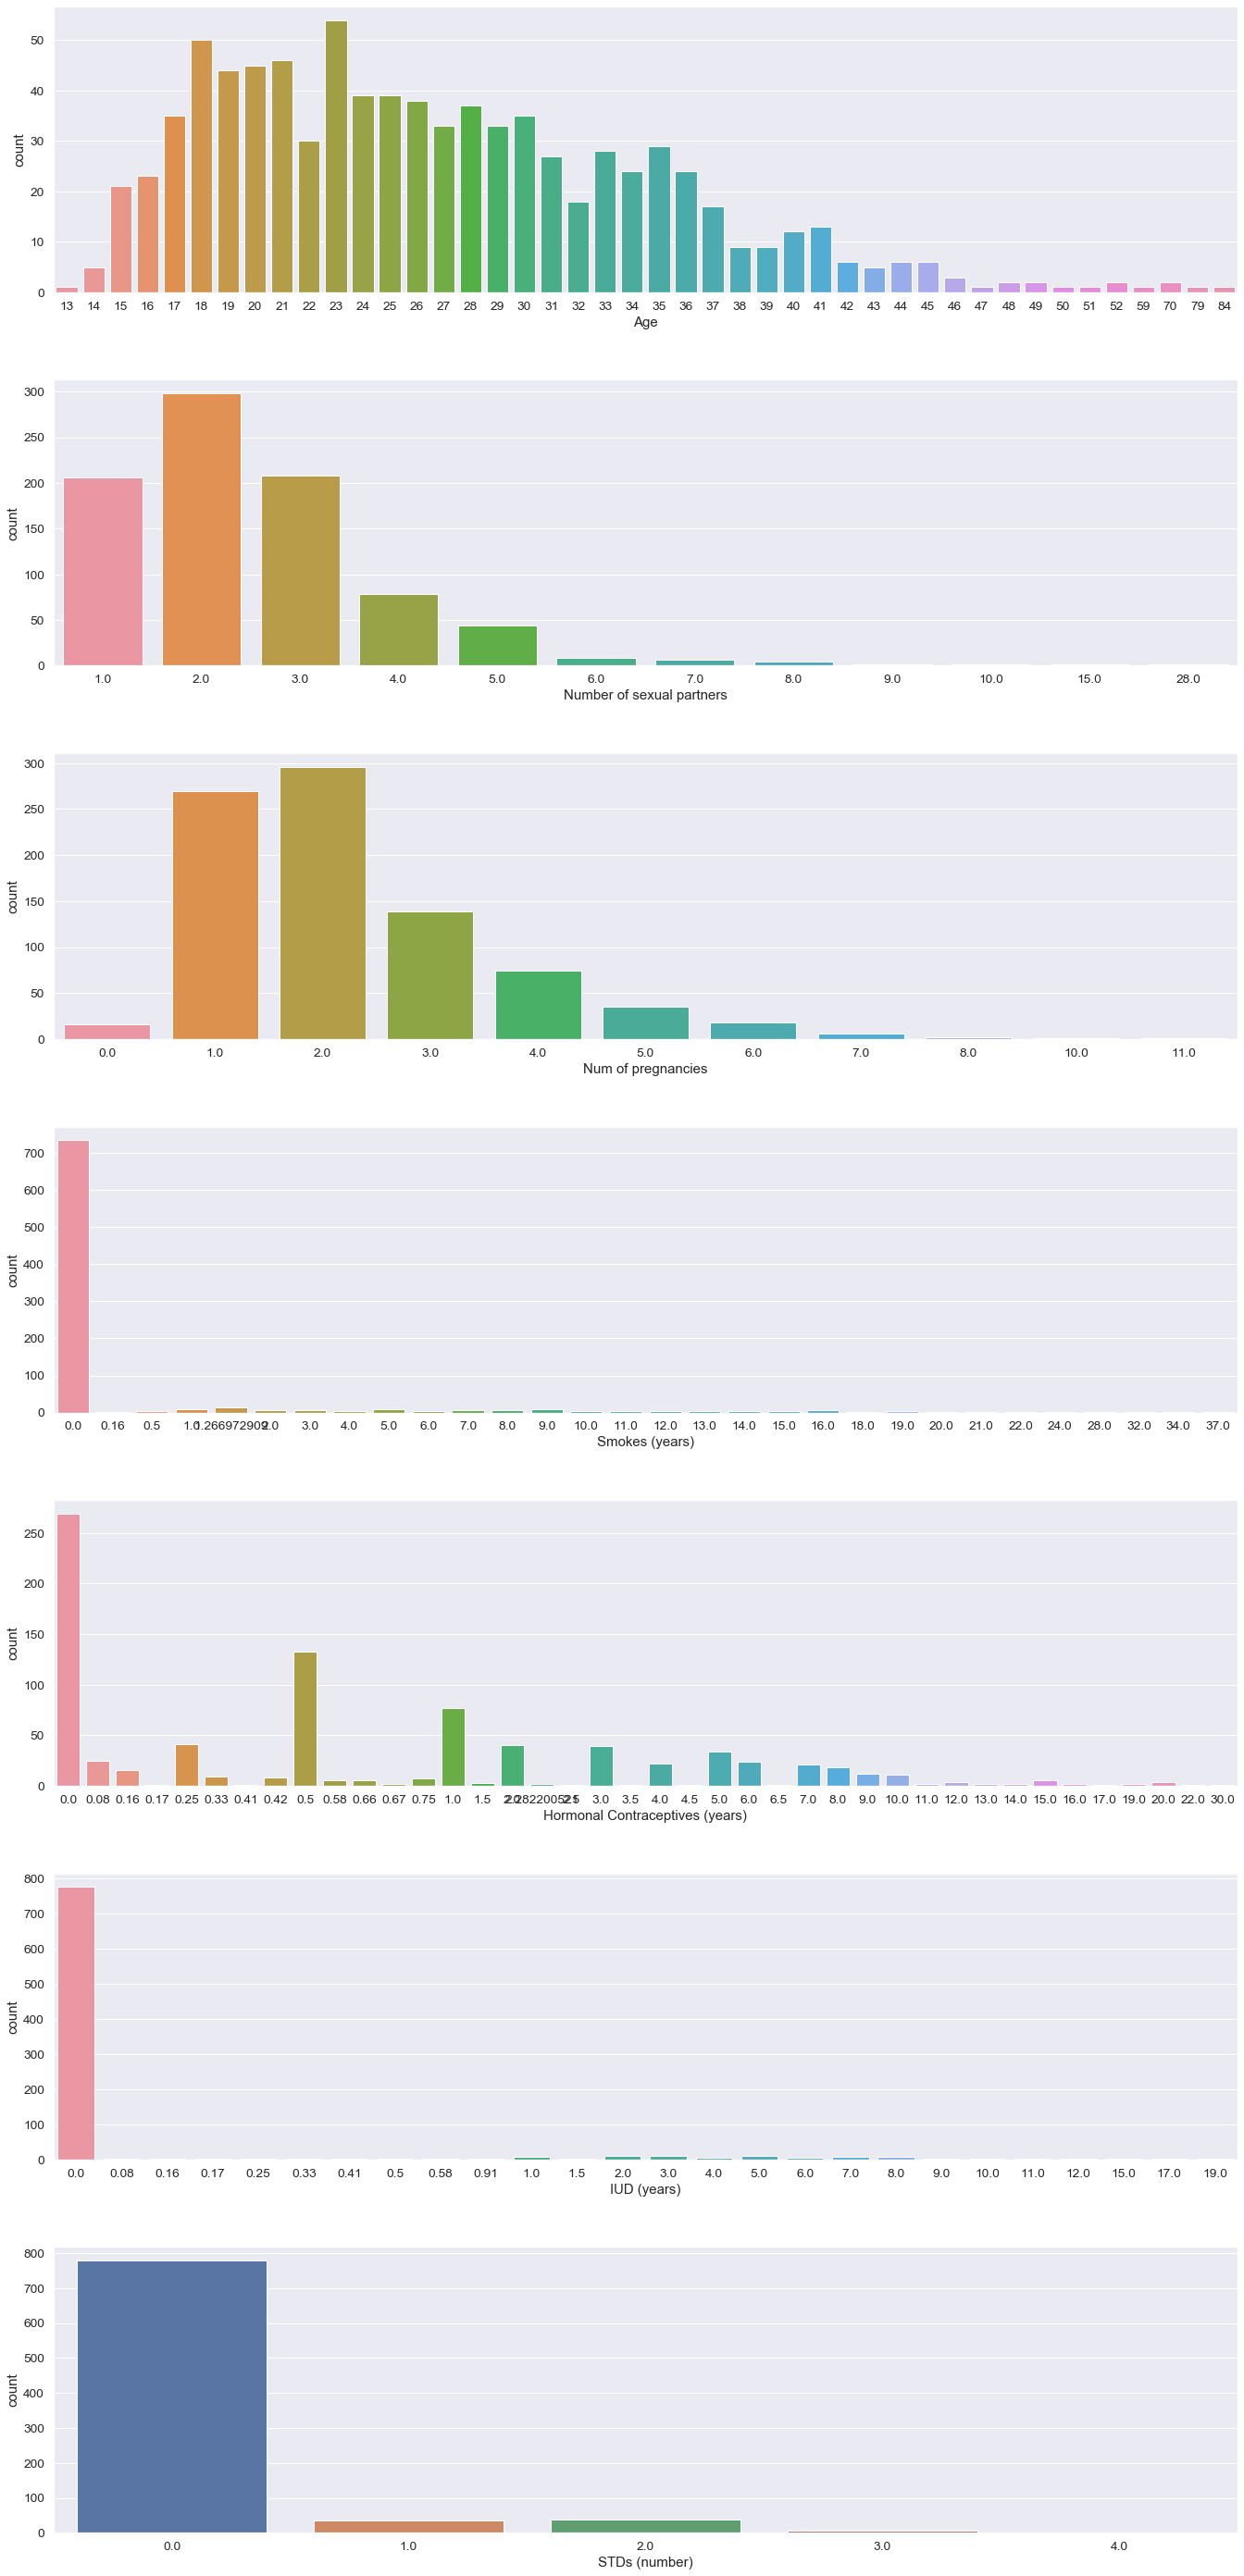

In [411]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)
plt.tight_layout(pad=5.5)

In [412]:
# Shuffling the data
#Shuffle
np.random.seed(2)
data_shuffle = data.sample(frac=1)

df_train = data_shuffle.iloc[1:686, :]
df_test = data_shuffle.iloc[686: , :]

In [413]:
df_train_feature = df_train[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]
train_label = np.array(df_train['Biopsy'])

df_test_feature = df_test[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']]
test_label = np.array(df_test['Biopsy'])

In [414]:
#Normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)

In [415]:
train_feature.shape

(685, 46)

In [416]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

# Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 

#Input layer
model.add(Dense(units=500, 
                input_dim=46, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 1
model.add(Dense(units=200,  kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [417]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 500)               23500     
_________________________________________________________________
dropout_20 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 200)               100200    
_________________________________________________________________
dropout_21 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 201       
Total params: 123,901
Trainable params: 123,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
3/3 - 0s - loss: 0.6742 - accuracy: 0.6642 - val_loss: 0.6111 - val_accuracy: 0.9270
Epoch 2/20
3/3 - 0s - loss: 0.5793 - accuracy: 0.9307 - val_loss: 0.4993 - val_accuracy: 0.9270
Epoch 3/20
3/3 - 0s - loss: 0.4579 - accuracy: 0.9307 - val_loss: 0.3624 - val_accuracy: 0.9270
Epoch 4/20
3/3 - 0s - loss: 0.3222 - accuracy: 0.9307 - val_loss: 0.2534 - val_accuracy: 0.9270
Epoch 5/20
3/3 - 0s - loss: 0.2325 - accuracy: 0.9307 - val_loss: 0.2226 - val_accuracy: 0.9270
Epoch 6/20
3/3 - 0s - loss: 0.2222 - accuracy: 0.9307 - val_loss: 0.2394 - val_accuracy: 0.9270
Epoch 7/20
3/3 - 0s - loss: 0.2213 - accuracy: 0.9307 - val_loss: 0.2448 - val_accuracy: 0.9270
Epoch 8/20
3/3 - 0s - loss: 0.2175 - accuracy: 0.9307 - val_loss: 0.2273 - val_accuracy: 0.9270
Epoch 9/20
3/3 - 0s - loss: 0.2049 - accuracy: 0.9307 - val_loss: 0.1967 - val_accuracy: 0.9270
Epoch 10/20
3/3 - 0s - loss: 0.1743 - accuracy: 0.9307 - val_loss: 0.1730 - val_accuracy: 0.9270
Epoch 11/20
3/3 - 0s - loss: 0.1490 - a

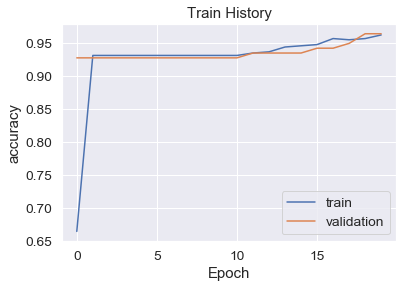

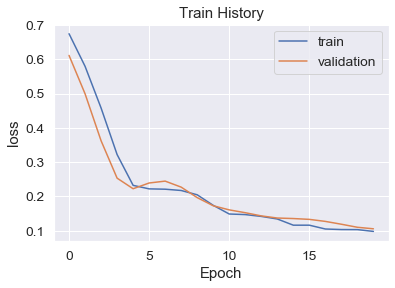

In [418]:
# Defining how to measure performance
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# Verbose=2, showing loss and accuracy change timely
train_history = model.fit(x=train_feature, y=train_label, validation_split=0.2, epochs=20, batch_size=200, verbose=2) 

#visualize the loss and accuracy after each epoch
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


In [419]:
#For saving weights
model.save_weights("../CNN using keras/cervical_cancer_model.h5")
print('model saved to disk')

model saved to disk


<i>When the model is trained to so many epochs, there's overfitting because the traoning set deviates from the validation set

# Model Prediction and Accuracy

In [420]:
scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])

6/6 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9651


accuracy= 0.9651162624359131


In [421]:
df_pred = pd.DataFrame({'Biopsy' :test_label})
df_pred['Prediction'] = prediction

In [422]:
df_pred

,Biopsy,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
167,0,0
168,0,0
169,0,0
170,0,0


In [423]:
# What went wrong
df_pred[ df_pred['Biopsy'] != df_pred['Prediction'] ]

,Biopsy,Prediction
13,0,1
34,1,0
46,0,1
57,1,0
58,1,0
85,0,1
117,1,0
137,1,0
145,0,1
150,0,1


In [424]:
df_pred['Prediction'].value_counts()

0    165
1      7
Name: Prediction, dtype: int64

In [425]:
df_pred['Biopsy'].value_counts()

0    165
1      7
Name: Biopsy, dtype: int64

total test case number:  172


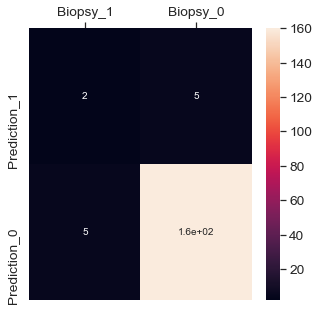

In [426]:
cols = ['Biopsy_1','Biopsy_0'] 
rows = ['Prediction_1','Prediction_0'] 

B1P1 = len(df_pred[(df_pred['Prediction'] == df_pred['Biopsy']) & (df_pred['Biopsy'] == 1)])
B1P0 = len(df_pred[(df_pred['Prediction'] != df_pred['Biopsy']) & (df_pred['Biopsy'] == 1)])
B0P1 = len(df_pred[(df_pred['Prediction'] != df_pred['Biopsy']) & (df_pred['Biopsy'] == 0)])
B0P0 = len(df_pred[(df_pred['Prediction'] == df_pred['Biopsy']) & (df_pred['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

# Calculating sensitivity, specificity, false_positive_rate and false_negative_rate

In [427]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('**************')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)
    

total_num:  172
G1P1:  2
G0P1:  5
G1P0:  5
G0P0:  160
**************
sensitivity:  0.2857142857142857
specificity:  0.9696969696969697
false_positive_rate:  0.030303030303030304
false_negative_rate:  0.7142857142857143


(172,
 0.2857142857142857,
 0.9696969696969697,
 0.030303030303030304,
 0.7142857142857143)

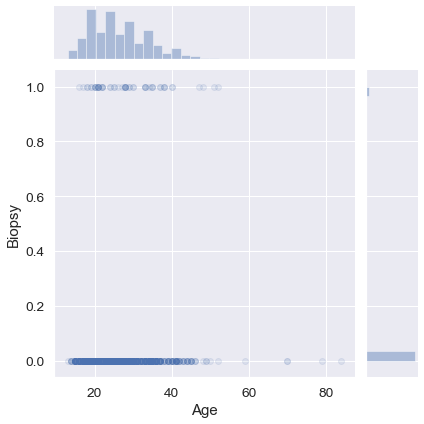

In [428]:
import seaborn as sns
sns.jointplot(x='Age', y='Biopsy', data=data, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

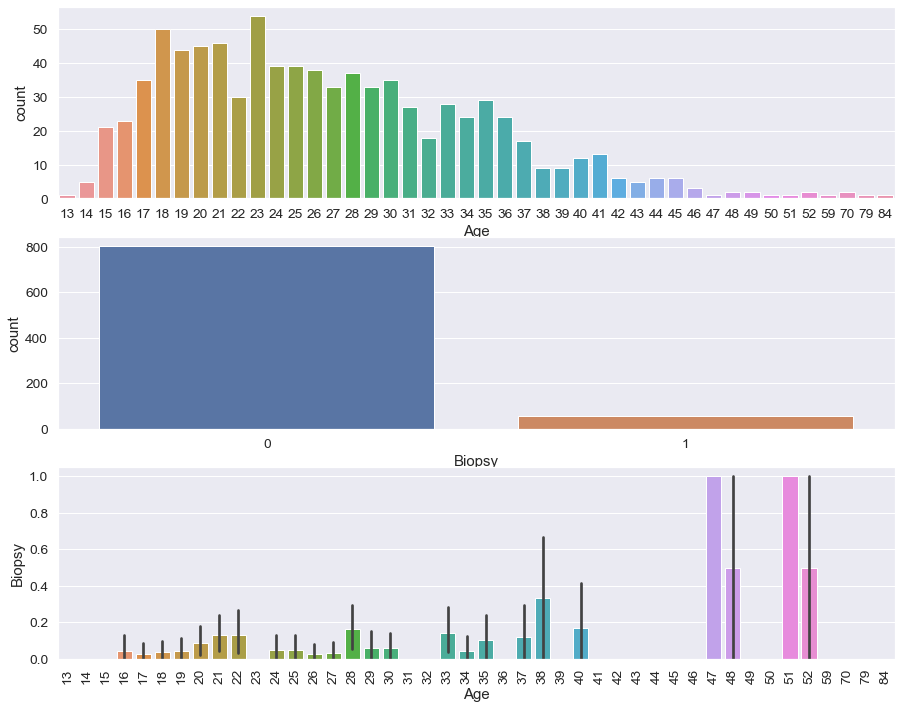

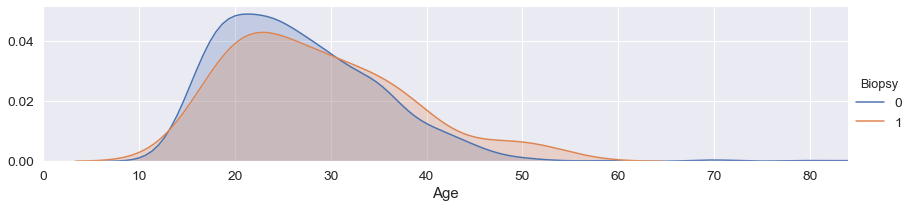

In [429]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=data, ax=ax1)
#plt.xticks(rotation=90)
sns.countplot(x='Biopsy', data=data, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=data, ax=ax3)
plt.xticks(rotation=90)

#Stratified
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

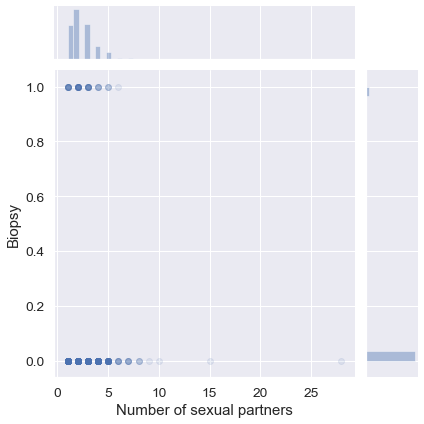

In [430]:
import seaborn as sns
sns.jointplot(x='Number of sexual partners', y='Biopsy', data=data, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

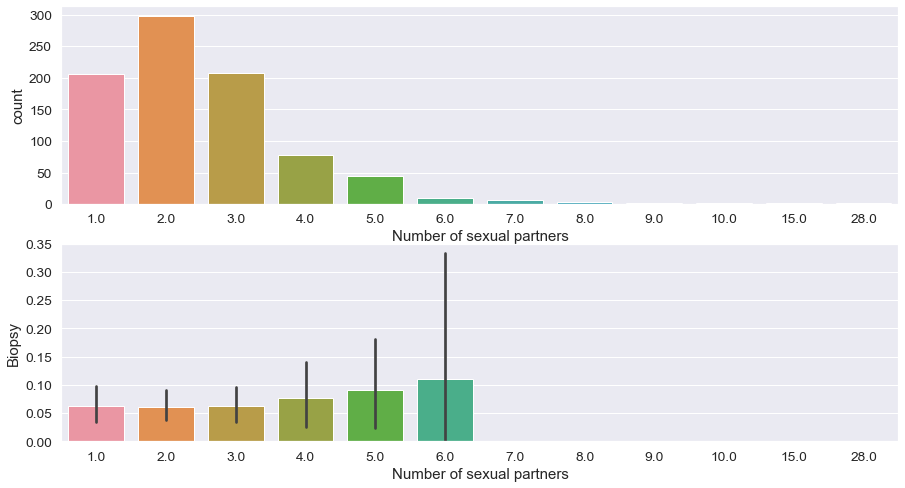

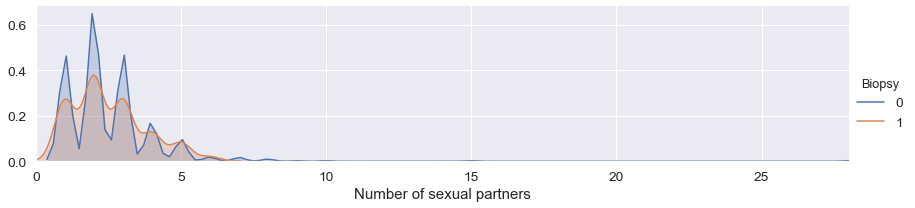

In [431]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=data, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=data, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

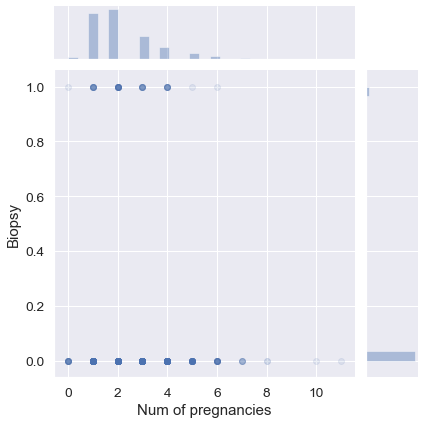

In [432]:
import seaborn as sns
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=data, alpha=0.1) 

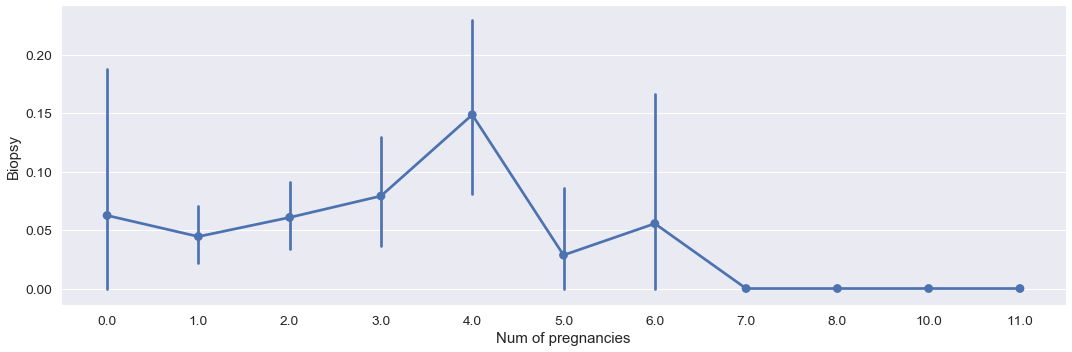

In [433]:
sns.factorplot('Num of pregnancies','Biopsy',data=data, size=5, aspect=3)

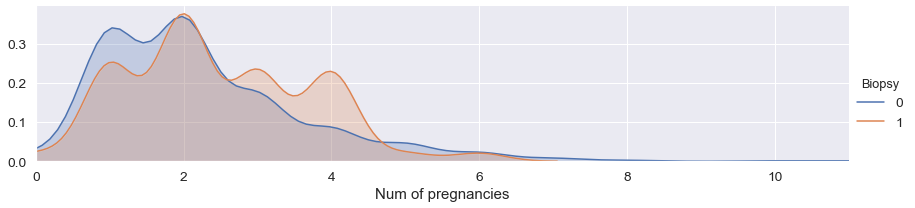

In [434]:
#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, data['Num of pregnancies'].max()))
facet.add_legend()

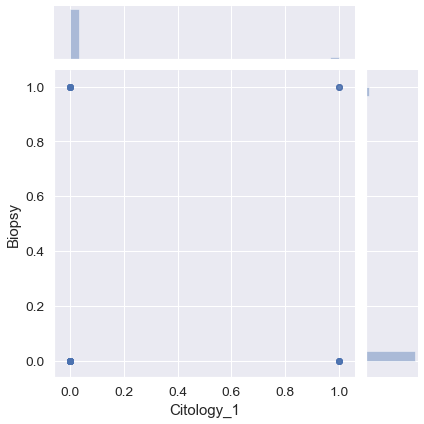

In [435]:
# Cytology
import seaborn as sns
sns.jointplot(x='Citology_1', y='Biopsy', data=data, alpha=0.1) 

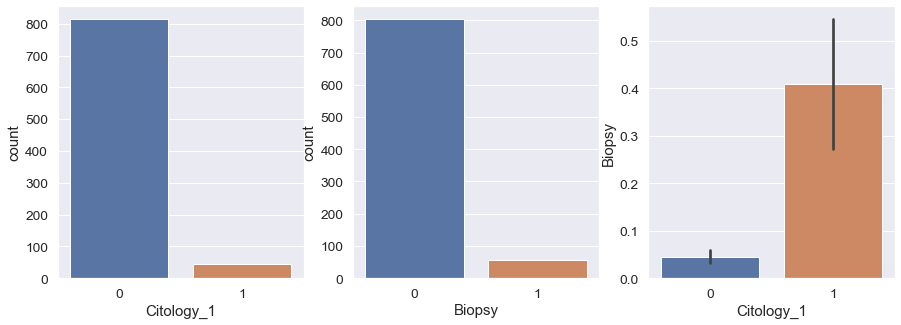

In [436]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Citology_1', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Citology_1', y='Biopsy', data=data, ax=axis3)  #categorical to categorical

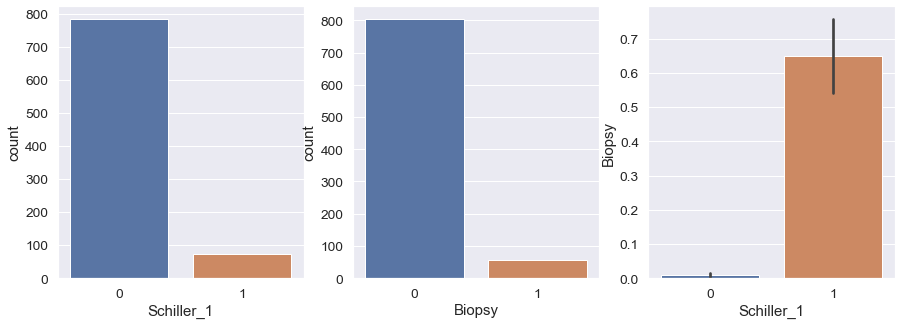

In [437]:
# Schiller
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller_1', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Schiller_1', y='Biopsy', data=data, ax=axis3) #categorical to categorical

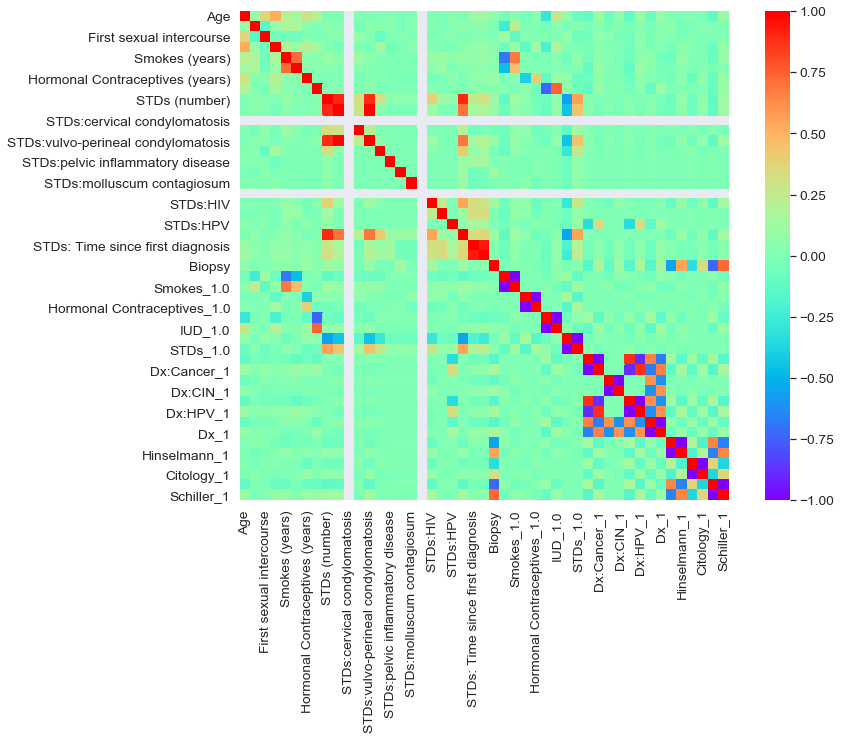

In [438]:
# Check different relationships within the data
corrmat = data.corr()
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

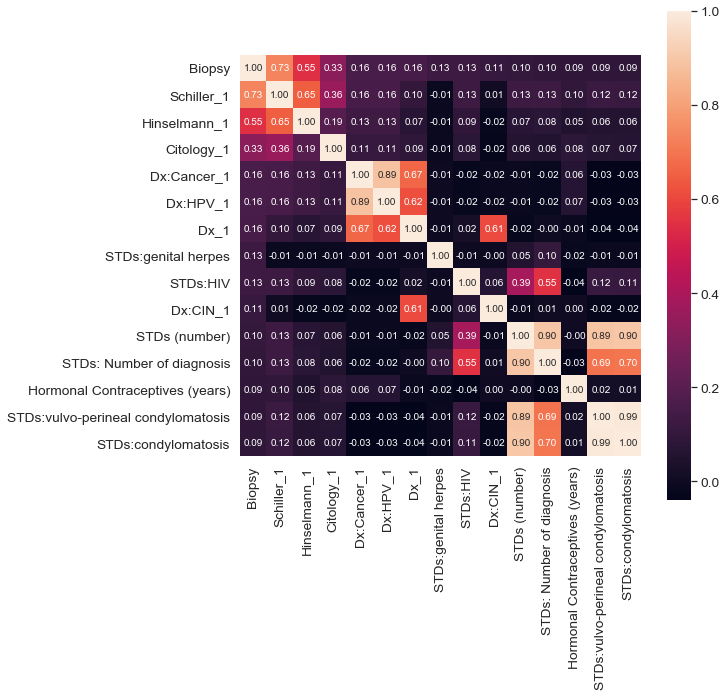

In [439]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(9,9)) 

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# Conclusion:
'Schiller_1', 'Hinselmann_1' and 'cytology_1' had the highest correlation with biopsy(+).
The result matched the common sense of the medical knowldege: High specificity diagnositic tool would have low false positive error.